Pandas inherits NumPy universal functions. And it includes a couple useful twists.   

Unary operation - perserve index and column labels

Binary operation - align indices 

We will also see well-defined operations between 1d `Series` structures and 2d `DataFrame` structures

# Ufuncs: Index Preservation

In [1]:
import pandas as pd
import numpy as np

In [3]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [7]:
df = pd.DataFrame(rng.randint(0,10,(3,4)), 
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,8,1,9,8
1,9,4,1,3
2,6,7,2,0


In [10]:
df2 = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'D', 'C'])
df2

,A,B,D,C
0,1,9,3,7
1,6,8,7,4
2,1,4,7,9


In [11]:
df + df2

,A,B,C,D
0,9,10,16,11
1,15,12,5,10
2,7,11,11,7


In [8]:
# Notice the result will be another Pandas object with indices perserved
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [10]:
# notice how the row and column indices are preserved
np.sin(df * np.pi / 4)

,A,B,C,D
0,1.224647e-16,0.000000,7.071068e-01,-0.707107
1,-2.449294e-16,0.000000,7.071068e-01,1.000000
2,-1.000000e+00,0.707107,-2.449294e-16,1.000000


# UFuncs: Index Alignment

For binary operations on two `Series` or `DataFrame` objects, Pandas will align indices in the process of performing the operation. This is very convenient when working with incomplete data, as we'll see in some of the examples that follow.

## Index alignment in Series

Suppose we are combining two different data sources, and find only the top three US states by area and the top three US states by population:

In [11]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [12]:
# What happens here?
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the *union* of indices of the two input arrays:

In [13]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry it marked with `NaN`

In [14]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators. For example, calling `A.add(B)` is equivalent to calling `A + B`, but allows optional explicit specification of the fill value for any elements in `A` or `B` that might be missing:

In [19]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

## Index alignment in DataFrame

In [20]:
A = pd.DataFrame(rng.randint(0, 20, (2,2)), 
                 columns = list('AB'))
A

,A,B
0,4,18
1,6,8


In [21]:
B = pd.DataFrame(rng.randint(0,10,(3,3)), 
                 columns=list('BAC'))
B

,B,A,C
0,6,1,3
1,8,1,9
2,8,9,4


In [22]:
A + B

,A,B,C
0,5.0,24.0,NaN
1,7.0,16.0,NaN
2,NaN,NaN,NaN


In [24]:
A

,A,B
0,4,18
1,6,8


In [23]:
A.stack()

0  A     4
   B    18
1  A     6
   B     8
dtype: int32

In [28]:
fill = A.values.mean()

In [29]:
A.add(B, fill_value=fill)

,A,B,C
0,5.0,24.0,12.0
1,7.0,16.0,18.0
2,18.0,17.0,13.0


The following table lists Python operators and their equivalent Pandas object methods:

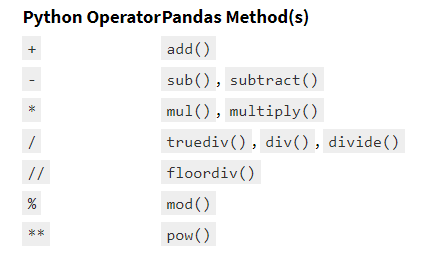

# Ufuncs: Operations between DataFrame and Series

When performing operations between a `DataFrame` and a `Series`, the index and column alignment is semilarly maintained. Operations between a `DataFrame` and a `Series` are similar to operations between a 2d and 1d np array. Consider one common operation, where we find the difference of a wd array and one of its rows:

In [38]:
# A = rng.randint(10, size=(3,4))
A = np.array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [39]:
# Could you explain why this is the case?
A - A[0] 

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In Pandas, the convention similarly operates row-wise by default:

In [40]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0, :]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [49]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [50]:
df - df['R'].values[:,np.newaxis]

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [52]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [54]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [53]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the types of silly errors that might come up when working with heterogeneous and/or misaligned data in raw NumPy arrays